# Maximum Likelihood and Logistic Regression


In [1]:
%%html
<style type='text/css'>.CodeMirror{
font-size: 18px;
</style>
    
    from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 18px; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Throwing two dice
sum = range(2,13)
psum = np.array([1,2,3,4,5,6,5,4,3,2,1])/36.
print(psum.sum())

1.0


Text(0.5, 1.0, 'PDF of sum of two dice')

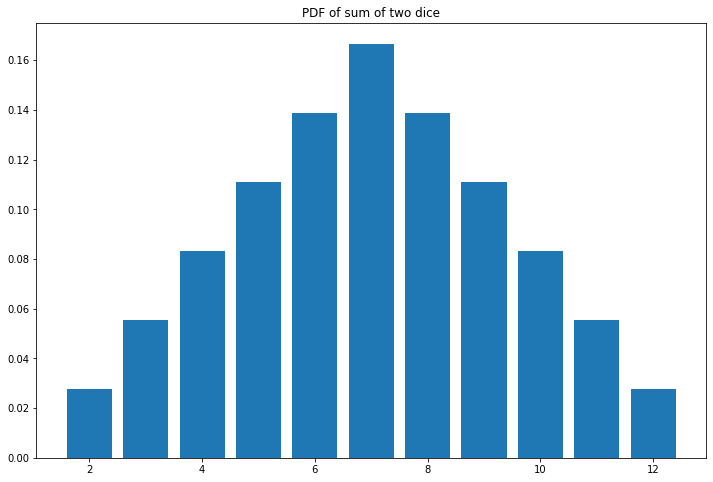

In [4]:
plt.figure(figsize=(12,8))
plt.bar(sum,psum)

plt.title("PDF of sum of two dice")

In [5]:
print(np.mean(sum),np.std(sum))

7.0 3.1622776601683795


In [6]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
dat = iris["data"][:, 3:]  # petal width
irisType = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

In [9]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(dat,irisType)

LogisticRegression(random_state=42)

## Plot probability
* Use predict_proba

(0.0, 3.0, -0.02, 1.02)

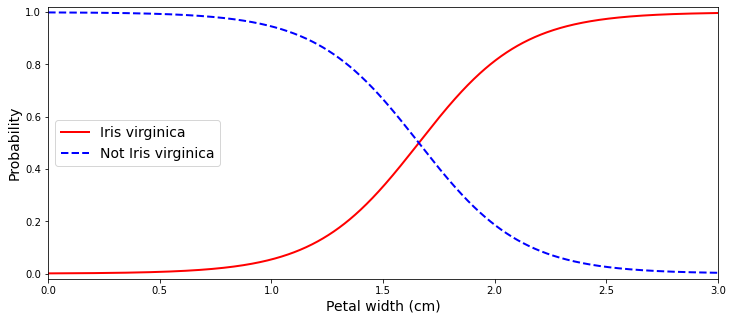

In [10]:
dat_new = np.linspace(0, 3, 1000).reshape(-1, 1)
irisType_proba = log_reg.predict_proba(dat_new)
plt.figure(figsize=(12,5))
plt.plot(dat_new, irisType_proba[:, 1], "r-", linewidth=2, label="Iris virginica")
plt.plot(dat_new, irisType_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

### Misclassifications?

(0.0, 3.0, -0.02, 1.02)

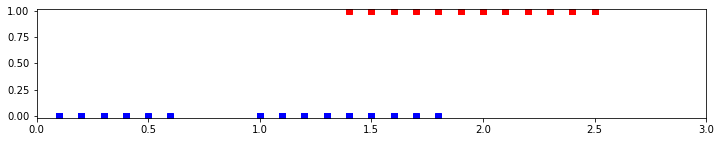

In [11]:
plt.figure(figsize=(12,2))
plt.plot(dat[irisType==0], irisType[irisType==0], "bs")
plt.plot(dat[irisType==1], irisType[irisType==1], "rs")
plt.axis([0, 3, -0.02, 1.02])